In [1]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [8]:
Q= np.zeros([25,4])
Qs = []
gamma = 0.99

In [9]:
Q

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [74]:
wall = [1,6,15,16,17,18,13,8]

In [75]:
def valid_action(s,a) :
    if s//5 == 0  and a== 0 : return False #맨위에 칸에 0번 방향(윗쪽) 은 false
    if s//5 == 4 and a== 1: return False # 맨 밑에 쪽에 있는  1번방향(아랫쪽) 은 false
    if s%5 == 0 and a== 2: return False #맨 왼쪽 같에 있는 2번방향 (왼쪽)은 false
    if s%5 == 4 and a== 3: return False #맨 오른쪽에 있는 3번방향(오른쪽)은 false
    if s in wall  : return False
    return True

In [90]:
Q= np.zeros([25,4])
Qs = []
gamma = 0.9

s = 0
ds = [-5,5,-1,1] # 위치 옮기기 

for epoch in range(100):
    for s in range(25):
        if s == 24: #마지막 셀일 경우
            Q[s] = 1
            continue
            
        for a in range(4):
            if not valid_action(s,a): continue
            s_new = s + ds[a]  #위치값 수정하기
            Q[s,a] = 0 + gamma*np.max(Q[s_new])
            
    Qs.append(Q.copy())

In [91]:
Qs[99]

array([[0.        , 0.28242954, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.43046721, 0.        , 0.531441  ],
       [0.        , 0.        , 0.4782969 , 0.59049   ],
       [0.        , 0.6561    , 0.531441  , 0.        ],
       [0.25418658, 0.3138106 , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.4782969 , 0.38742049, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.59049   , 0.729     , 0.        , 0.        ],
       [0.28242954, 0.        , 0.        , 0.34867844],
       [0.        , 0.        , 0.3138106 , 0.38742049],
       [0.43046721, 0.        , 0.34867844, 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.6561    , 0.81      , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        ,

In [92]:
fa = []
for i in range(25):
    fa.append(max(Qs[99][i]))

In [93]:
Q_val= np.array(fa).reshape(5,5)

In [94]:
import pandas as pd
df = pd.DataFrame(Q_val)
df


,0,1,2,3,4
0,0.282430,0.00000,0.531441,0.59049,0.6561
1,0.313811,0.00000,0.478297,0.00000,0.7290
2,0.348678,0.38742,0.430467,0.00000,0.8100
3,0.000000,0.00000,0.000000,0.00000,0.9000
4,0.656100,0.72900,0.810000,0.90000,1.0000


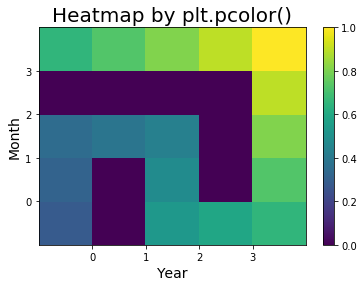

In [95]:
# heatmap by plt.pcolor()

plt.pcolor(df)

plt.xticks(np.arange(1, len(df.columns), 1), df.columns)

plt.yticks(np.arange(1, len(df.index), 1), df.index)

plt.title('Heatmap by plt.pcolor()', fontsize=20)

plt.xlabel('Year', fontsize=14)

plt.ylabel('Month', fontsize=14)

plt.colorbar()



plt.show()



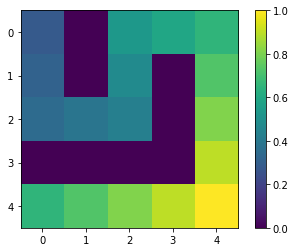

In [96]:
plt.imshow(Q.max(axis=1).reshape(5,5))
plt.colorbar()

In [97]:
def valid_action(s,a) :
    if s//5 == 0  and a== 0 : return False #맨위에 칸에 0번 방향(윗쪽) 은 false
    if s//5 == 4 and a== 1: return False # 맨 밑에 쪽에 있는  1번방향(아랫쪽) 은 false
    if s%5 == 0 and a== 2: return False #맨 왼쪽 같에 있는 2번방향 (왼쪽)은 false
    if s%5 == 4 and a== 3: return False #맨 오른쪽에 있는 3번방향(오른쪽)은 false
    if s in wall or (s+ds[a] in wall) : return False
    return True

In [98]:
Q= np.zeros([25,4])
Qs = []
gamma = 0.9

s = 0
ds = [-5,5,-1,1] # 위치 옮기기 

for epoch in range(100):
    for s in range(25):
        if s == 24: #마지막 셀일 경우
            Q[s] = 1
            continue
            
        for a in range(4):
            if not valid_action(s,a): continue
            s_new = s + ds[a]  #위치값 수정하기
            Q[s,a] = 0 + gamma*np.max(Q[s_new])
            
    Qs.append(Q.copy())

In [99]:
Qs[99]


array([[0.        , 0.28242954, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.43046721, 0.        , 0.531441  ],
       [0.        , 0.        , 0.4782969 , 0.59049   ],
       [0.        , 0.6561    , 0.531441  , 0.        ],
       [0.25418658, 0.3138106 , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.4782969 , 0.38742049, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.59049   , 0.729     , 0.        , 0.        ],
       [0.28242954, 0.        , 0.        , 0.34867844],
       [0.        , 0.        , 0.3138106 , 0.38742049],
       [0.43046721, 0.        , 0.34867844, 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.6561    , 0.81      , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        ,